# Detect and plot different keypoints on images using LoG, DoG in Scikit Image:

In [1]:
import numpy as np
from skimage import io
from skimage import data_dir
import matplotlib.pyplot as plt
from skimage.io import imshow

In [2]:
filename=('/home/diganta/Documents/IITKGP/Project/20150320_DM4VM_dataset/01/train/*.jpg')
fname=('/home/diganta/Documents/IITKGP/Project/20150320_DM4VM_dataset/01/train/set153_2_s8_83.jpg')

/home/diganta/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


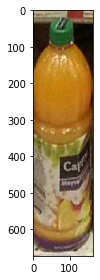

In [3]:
image=io.imread(fname,as_grey=False) #read a single rgb image from dm4vm dataset
imshow(image)

/home/diganta/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


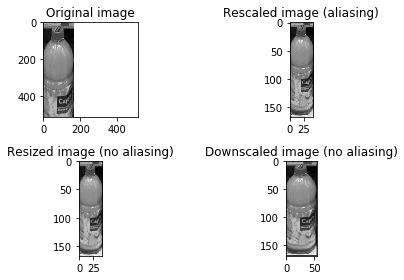

In [4]:
#Rescale, resize, and downscale
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean
im = io.imread(fname, as_grey=True)
image_gray = rgb2gray(im)
image_rescaled = rescale(im, 0.25, anti_aliasing=False)
image_resized = resize(im, (im.shape[0] // 4, image.shape[1] // 4),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(im, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(im, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

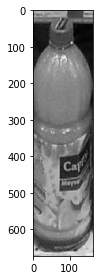

In [17]:
from skimage.color import rgb2gray
from skimage.io import imshow
import skimage
from skimage import io
im = io.imread(fname, as_grey=True)
image_gray = rgb2gray(im)
imshow(im)

In [22]:
img_sim1=skimage.io.imread("/home/diganta/Documents/IITKGP/Project/SuperPointPretrainedNetwork-master/21-40/33/Diff.jpg",as_grey=True)

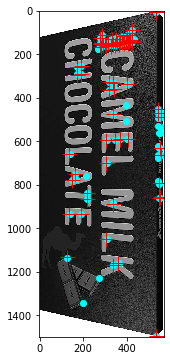

In [25]:
#harris corner detection
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from matplotlib import pyplot as plt
from skimage import data
coords = corner_peaks(corner_harris(img_sim1), min_distance=5)
coords_subpix = corner_subpix(img_sim1, coords, window_size=10)
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(img_sim1, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis()
plt.show()


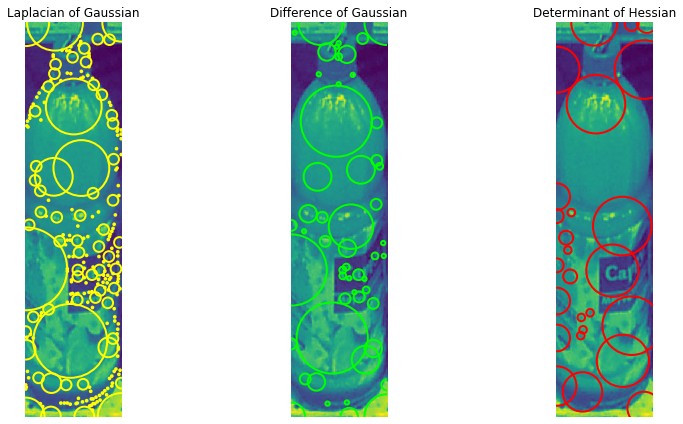

In [27]:
#plot different keypoints on images using LoG, DoG in Scikit Image
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
blobs_log = blob_log(image_gray,min_sigma=1,max_sigma=50, num_sigma=10, threshold=.02)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=50, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=50,overlap=0.5,threshold=.001)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image_gray)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()
